In [1]:
import pandas as pd

# Load the uploaded CSV file to inspect its contents
df = pd.read_csv('listings.csv')

print(df.info())

# Temporarily display all columns
pd.set_option('display.max_columns', None)
# Now print the head of the DataFrame with all columns visible
print(df.head())
# Reset back to the default settings after displaying the data (optional)
pd.reset_option('display.max_columns')

#print(df.columns.tolist())
#print(len(df['amenities'].unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36807 entries, 0 to 36806
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            36807 non-null  int64  
 1   listing_url                                   36807 non-null  object 
 2   scrape_id                                     36807 non-null  int64  
 3   last_scraped                                  36807 non-null  object 
 4   source                                        36807 non-null  object 
 5   name                                          36807 non-null  object 
 6   description                                   35854 non-null  object 
 7   neighborhood_overview                         18340 non-null  object 
 8   picture_url                                   36806 non-null  object 
 9   host_id                                       36807 non-null 

In [2]:
# Display only columns with missing data (out of 36807 data points)
missing_data = df.isnull().sum()
missing_data[missing_data > 0]

description                       953
neighborhood_overview           18467
picture_url                         1
host_location                    8260
host_about                      17323
host_response_time               6747
host_response_rate               6747
host_acceptance_rate             4349
host_is_superhost                2144
host_neighbourhood              13699
neighbourhood                   18467
neighbourhood_group_cleansed    36807
bathrooms                        2956
bathrooms_text                     31
bedrooms                          610
beds                             2955
price                            2956
calendar_updated                36807
has_availability                 1250
first_review                     6979
last_review                      6979
review_scores_rating             6979
review_scores_accuracy           6980
review_scores_cleanliness        6979
review_scores_checkin            6980
review_scores_communication      6979
review_score

In [3]:
df_imputated = pd.read_csv('listings.csv')

df_imputated.drop_duplicates()
df_imputated.drop(['license', 'calendar_updated', 'neighbourhood_group_cleansed'], axis=1, inplace=True)
df_imputated.drop(['id', 'listing_url', 'scrape_id', 'picture_url', 'host_id', 'host_url', 'host_thumbnail_url', 'host_picture_url'], axis=1, inplace=True)

In [4]:
pd.set_option('display.max_columns', None)
# Display columns that are not of type int64 or float64
non_numeric_columns = df_imputated.select_dtypes(exclude=['int64', 'float64']).columns

# Show the column names and their corresponding data types
print(f'dtypes: {df_imputated[non_numeric_columns].dtypes}')
print(df_imputated.columns.tolist())
print(df_imputated.head())

missing_data_train_set = df_imputated.isnull().sum()
print(f'missing_data_train_set: {missing_data_train_set[missing_data_train_set > 0]}')
# Final processed train_set and test_set
#print("Processed Training Set:")
#print(train_set.head())

#print("\nProcessed Test Set:")
#print(test_set.head())

dtypes: last_scraped              object
source                    object
name                      object
description               object
neighborhood_overview     object
host_name                 object
host_since                object
host_location             object
host_about                object
host_response_time        object
host_response_rate        object
host_acceptance_rate      object
host_is_superhost         object
host_neighbourhood        object
host_verifications        object
host_has_profile_pic      object
host_identity_verified    object
neighbourhood             object
neighbourhood_cleansed    object
property_type             object
room_type                 object
bathrooms_text            object
amenities                 object
price                     object
has_availability          object
calendar_last_scraped     object
first_review              object
last_review               object
instant_bookable          object
dtype: object
['last_scraped', 'sou

# Feature Engineering

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import gender_guesser.detector as gender
from datetime import datetime

## Step 4: Convert date columns ('calendar_last_scraped', 'first_review', 'last_review') to datetime

df_imputated['calendar_last_scraped'] = pd.to_datetime(df_imputated['calendar_last_scraped'], errors='coerce')
df_imputated['first_review'] = pd.to_datetime(df_imputated['first_review'], errors='coerce')
df_imputated['last_review'] = pd.to_datetime(df_imputated['last_review'], errors='coerce')
df_imputated['last_scraped'] = pd.to_datetime(df_imputated['last_scraped'], errors='coerce')
df_imputated['host_since'] = pd.to_datetime(df_imputated['host_since'], errors='coerce')

# Step 1: Create new features before splitting the data into train and test sets

## Create the 'host_active_days' feature
df_imputated['host_active_days'] = (df_imputated['last_scraped'] - df_imputated['host_since']).dt.days

# Optionally drop the original date columns if they are no longer needed
df_imputated.drop(['last_scraped', 'host_since'], axis=1, inplace=True)

## Create 'host_about_length', 'name_length', 'description_length', 'neighborhood_overview_length'

df_imputated['host_about_length'] = df_imputated['host_about'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
df_imputated.drop('host_about', axis=1, inplace=True)

df_imputated['name_length'] = df_imputated['name'].apply(lambda x: len(str(x)))
df_imputated['description_length'] = df_imputated['description'].apply(lambda x: len(str(x)))

df_imputated.drop(['name', 'description'], axis=1, inplace=True)

df_imputated['neighborhood_overview_length'] = df_imputated['neighborhood_overview'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
df_imputated.drop('neighborhood_overview', axis=1, inplace=True)

## Step 2: Create 'days_since' features

current_date = datetime.now()

df_imputated['days_since_scraped'] = (current_date - df_imputated['calendar_last_scraped']).dt.days
df_imputated['days_since_first_review'] = (df_imputated['calendar_last_scraped'] - df_imputated['first_review']).dt.days
df_imputated['days_since_last_review'] = (df_imputated['calendar_last_scraped'] - df_imputated['last_review']).dt.days

# Drop original date columns
df_imputated.drop(['calendar_last_scraped', 'first_review', 'last_review'], axis=1, inplace=True)


C:\Users\acer\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
import numpy as np
import pandas as pd

# Extract all unique values from the 'bathrooms_text' column
unique_bathrooms_text = df['bathrooms_text'].unique()
print(unique_bathrooms_text)

# Function to extract bathroom numbers from the text
def extract_bathrooms(row):
    bathroom_text = row['bathrooms_text']
    bathroom = row['bathrooms']
    
    # If both bathrooms and bathrooms_text are NaN, return NaN
    if pd.isnull(bathroom) and pd.isnull(bathroom_text):
        return np.nan
    
    # If bathrooms_text contains 'half', return 0.5
    if isinstance(bathroom_text, str):
        bathroom_text = bathroom_text.lower()
        if 'half' in bathroom_text:
            return 0.5
        # Extract digits if they exist
        num = ''.join([ch for ch in bathroom_text if ch.isdigit() or ch == '.'])
        return float(num) if num else np.nan
    
    # Otherwise, return the existing value of bathrooms
    return bathroom

# Function to classify bathrooms into 'private', 'shared', 'no bathroom', or NaN
def classify_bathroom(row):
    bathrooms_text = row['bathrooms_text']
    bathrooms = row['bathrooms']
    
    # If bathrooms is NaN, return NaN for category as well
    if pd.isnull(bathrooms):
        return 'no bathroom'
    
    # Convert bathrooms_text to lowercase for comparison
    if isinstance(bathrooms_text, str):
        text = bathrooms_text.lower()
        
        if bathrooms == 0:  # If bathrooms is 0, it indicates 'no bathroom'
            return 'no bathroom'
        elif 'shared' in text:  # If 'shared' is mentioned in text
            return 'shared'
        elif 'private' in text:  # If 'private' is mentioned in text
            return 'private'
    
    # Default to 'private' if not explicitly mentioned
    return 'private'

df_imputated['bathrooms'] = df_imputated.apply(extract_bathrooms, axis=1)
df_imputated['bathroom_category'] = df_imputated.apply(classify_bathroom, axis=1)

pd.set_option('display.max_rows', None)
print(df_imputated[['bathrooms_text', 'bathrooms', 'bathroom_category']].iloc[0: 100])
print(df[['bathrooms_text', 'bathrooms']].iloc[0: 100])
#pd.reset_option('display.max_rows')

df_imputated.drop(['bathrooms_text'], axis=1, inplace=True)

['1 bath' '1.5 baths' '2 baths' '5.5 baths' '2.5 baths' '0 baths'
 '1 shared bath' '1 private bath' '6 baths' '1.5 shared baths' nan
 '3 baths' '2 shared baths' '2.5 shared baths' '4.5 baths'
 '6 shared baths' '5 baths' '4 baths' '3.5 baths' '4 shared baths'
 '0 shared baths' '3 shared baths' '3.5 shared baths' 'Shared half-bath'
 'Half-bath' '9 baths' '8 shared baths' '5.5 shared baths'
 'Private half-bath' '7 baths' '4.5 shared baths' '22 baths'
 '7 shared baths' '6.5 shared baths' '10 baths' '9.5 baths' '16 baths'
 '7.5 baths' '13 baths' '8 baths' '8.5 shared baths' '7.5 shared baths'
 '5 shared baths' '6.5 baths' '9 shared baths' '12.5 baths' '8.5 baths'
 '15 baths' '20 baths']
      bathrooms_text  bathrooms bathroom_category
0             1 bath        1.0           private
1             1 bath        1.0           private
2             1 bath        1.0           private
3             1 bath        1.0           private
4          1.5 baths        1.5           private
5        

In [7]:
pd.set_option('display.max_columns', None)
# Display columns that are not of type int64 or float64
non_numeric_columns = df_imputated.select_dtypes(exclude=['int64', 'float64']).columns

# Show the column names and their corresponding data types
print(f'dtypes: {df_imputated[non_numeric_columns].dtypes}')
print(df_imputated.columns.tolist())

dtypes: source                    object
host_name                 object
host_location             object
host_response_time        object
host_response_rate        object
host_acceptance_rate      object
host_is_superhost         object
host_neighbourhood        object
host_verifications        object
host_has_profile_pic      object
host_identity_verified    object
neighbourhood             object
neighbourhood_cleansed    object
property_type             object
room_type                 object
amenities                 object
price                     object
has_availability          object
instant_bookable          object
bathroom_category         object
dtype: object
['source', 'host_name', 'host_location', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',

# Handle Missing Categorical Values 

In [8]:
import pandas as pd

# Fill missing values for categorical variables with 'missing' or similar labels
df_imputated['host_location'].fillna('No host location', inplace=True)

# 4. Fill 'host_is_superhost' with False
df_imputated['host_is_superhost'].fillna('f', inplace=True)

# 5. Fill 'host_neighbourhood' with 'unknown'
df_imputated['host_neighbourhood'].fillna('unknown', inplace=True)

# 6. Fill 'neighbourhood' with 'unknown'
df_imputated['neighbourhood'].fillna('unknown', inplace=True)

# 11. Fill 'has_availability' with False
df_imputated['has_availability'].fillna('f', inplace=True)

# Display the updated DataFrame
print(df_imputated.head())  # Check the first few rows to ensure everything worked as expected


            source      host_name            host_location host_response_time  \
0      city scrape        Candela             New York, NY     within an hour   
1      city scrape          María  Buenos Aires, Argentina     within an hour   
2  previous scrape         Monica         No host location                NaN   
3      city scrape  Elbio Mariano  Buenos Aires, Argentina     within an hour   
4      city scrape         Sergio  Buenos Aires, Argentina     within an hour   

  host_response_rate host_acceptance_rate host_is_superhost  \
0               100%                 100%                 t   
1               100%                 100%                 f   
2                NaN                  NaN                 f   
3                80%                  96%                 f   
4               100%                  99%                 f   

  host_neighbourhood  host_listings_count  host_total_listings_count  \
0            Palermo                    1                     

# Handle Missing Rates and Prices

In [9]:
# Fill missing review-related data with 0 (indicating no reviews)
df_imputated['review_scores_rating'].fillna(0, inplace=True)
df_imputated['review_scores_accuracy'].fillna(0, inplace=True)
df_imputated['review_scores_cleanliness'].fillna(0, inplace=True)
df_imputated['review_scores_checkin'].fillna(0, inplace=True)
df_imputated['review_scores_communication'].fillna(0, inplace=True)
df_imputated['review_scores_location'].fillna(0, inplace=True)
df_imputated['review_scores_value'].fillna(0, inplace=True)
df_imputated['reviews_per_month'].fillna(0, inplace=True)
# Set 'first_review' and 'last_review' as NaT (Not a Timestamp) to indicate no reviews

df_imputated.to_csv('listings_imputated.csv', index=False)

# 2. Fill 'host_response_rate' with 0
df_imputated['host_response_rate'].fillna(0, inplace=True)

# 3. Fill 'host_acceptance_rate' with 0
df_imputated['host_acceptance_rate'].fillna(0, inplace=True)

# since its under 8% missing values in prices, delete those rows
df_imputated = df_imputated.dropna(subset=['price'])
missing_percentages = df_imputated.isnull().mean() * 100
missing_percentages_over_0 = missing_percentages[missing_percentages > 0]


# Conversions

In [10]:
import pandas as pd
from datetime import datetime

## Step 1: Convert 'price', 'host_response_rate', 'host_acceptance_rate' to numeric

def convert_percentage(column):
    return column.apply(lambda x: float(str(x).rstrip('%')) / 100 if '%' in str(x) else float(x))

df_imputated['host_response_rate'] = convert_percentage(df_imputated['host_response_rate'])
df_imputated['host_acceptance_rate'] = convert_percentage(df_imputated['host_acceptance_rate'])
df_imputated['price'] = pd.to_numeric(df_imputated['price'].replace({'\$': '', ',': ''}, regex=True))

## Step 2: Convert boolean columns ('t'/'f') to binary (1/0)

boolean_cols = ['instant_bookable', 'host_identity_verified', 'host_has_profile_pic', 'host_is_superhost', 'has_availability']
df_imputated[boolean_cols] = df_imputated[boolean_cols].replace({'t': 1, 'f': 0})

## Step 3: Convert 'host_response_time' to numeric

host_response_time_mapping = {
    'within an hour': 1.0,
    'within a few hours': 2.0,
    'within a day': 3.0,
    'a few days or more': 4.0,
    'unknown': 5.0  # You can handle unknown values as needed
}

df_imputated['host_response_time_numeric'] = df_imputated['host_response_time'].map(host_response_time_mapping)
df_imputated.drop('host_response_time', axis=1, inplace=True)



# Seperate Test and Train Dataset

In [11]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (80% train, 20% test)
train_set, test_set = train_test_split(df_imputated, test_size=0.2, random_state=42)
train_set = train_set.copy()
test_set = test_set.copy()

# Check the size of the splits
print("Training set size:", len(train_set))
print("Test set size:", len(test_set))

Training set size: 27080
Test set size: 6771


# Imputation with KNN

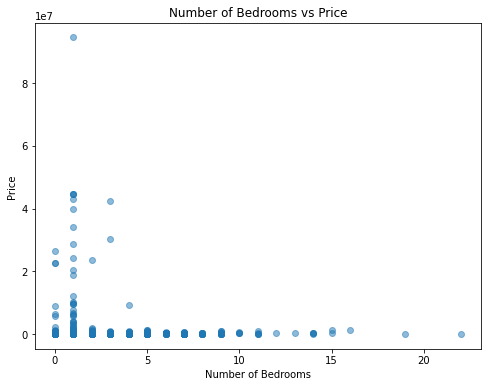

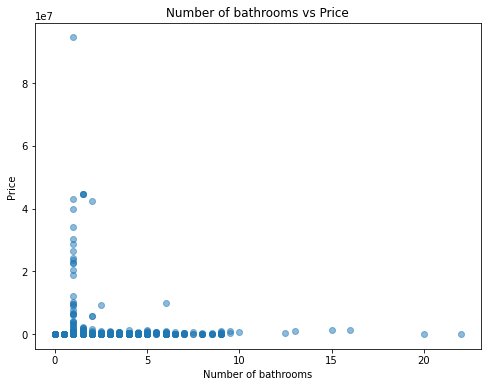

In [12]:
import matplotlib.pyplot as plt

# Scatter plot for 'bedroom' vs 'price'
plt.figure(figsize=(8, 6))
plt.scatter(train_set['bedrooms'], train_set['price'], alpha=0.5)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Number of Bedrooms vs Price')
plt.show()

import matplotlib.pyplot as plt

# Scatter plot for 'bedroom' vs 'price'
plt.figure(figsize=(8, 6))
plt.scatter(train_set['bathrooms'], train_set['price'], alpha=0.5)
plt.xlabel('Number of bathrooms')
plt.ylabel('Price')
plt.title('Number of bathrooms vs Price')
plt.show()


In [13]:
# Calculate the percentage of missing values for each feature
missing_percentages = train_set.isnull().mean() * 100

# Filter to show only features with missing values (greater than 0%)
missing_percentages_over_0 = missing_percentages[missing_percentages > 0]

# Sort by highest missing percentage (optional)
missing_percentages_sorted = missing_percentages_over_0.sort_values(ascending=False)

# Display the result
print(missing_percentages_sorted)


days_since_first_review       17.149188
days_since_last_review        17.149188
host_response_time_numeric    14.564254
bedrooms                       0.121861
bathrooms                      0.040620
beds                           0.033235
dtype: float64


In [14]:
from sklearn.impute import KNNImputer

# Step 1: Identify numerical columns (exclude categorical columns)
numerical_cols = train_set.select_dtypes(include=[np.number]).columns.tolist()

# Step 2: Apply KNN Imputer only to numerical columns (excluding 'price' if necessary)
numerical_cols_to_impute = [col for col in numerical_cols if col != 'price']  # Exclude 'price' if it's the target

# Initialize the KNN Imputer
imputer = KNNImputer(n_neighbors=5)

# Step 3: Fit and transform the training set's numerical columns
train_set[numerical_cols_to_impute] = imputer.fit_transform(train_set[numerical_cols_to_impute])

# Step 4: Transform (not fit) the test set to avoid data leakage
test_set[numerical_cols_to_impute] = imputer.transform(test_set[numerical_cols_to_impute])

# Verify that missing values have been imputed
print(train_set.isnull().sum())
print(test_set.isnull().sum())


source                                          0
host_name                                       0
host_location                                   0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_neighbourhood                              0
host_listings_count                             0
host_total_listings_count                       0
host_verifications                              0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood                                   0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0
bathrooms                                       0


In [15]:
# Calculate the percentage of missing values for each feature
missing_percentages = train_set.isnull().mean() * 100

# Filter to show only features with missing values (greater than 0%)
missing_percentages_over_0 = missing_percentages[missing_percentages > 0]

# Sort by highest missing percentage (optional)
missing_percentages_sorted = missing_percentages_over_0.sort_values(ascending=False)

# Display the result
print(missing_percentages_sorted)


Series([], dtype: float64)


# One-Hot Encoding

In [16]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import gender_guesser.detector as gender

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

## ['source', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bathroom_category']
def one_hot_encoding(one_hot_features, train_set, test_set):
    encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

    for i in one_hot_features:
        train_feature_encoded = encoder.fit_transform(train_set[[i]])
        test_feature_encoded = encoder.transform(test_set[[i]])

        train_encoded_df = pd.DataFrame(train_feature_encoded, columns=encoder.get_feature_names([i]))
        test_encoded_df = pd.DataFrame(test_feature_encoded, columns=encoder.get_feature_names([i]))

        # Ensure columns match in both train and test sets
        test_encoded_df = test_encoded_df.reindex(columns=train_encoded_df.columns, fill_value=0)
        
        train_set = pd.concat([train_set.reset_index(drop=True), train_encoded_df], axis=1)
        test_set = pd.concat([test_set.reset_index(drop=True), test_encoded_df], axis=1)

        train_set.drop([i], axis=1, inplace=True)
        test_set.drop([i], axis=1, inplace=True)

    return train_set, test_set

one_hot_features = ['source', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bathroom_category']

train_set.drop(['neighbourhood'], axis=1, inplace=True)
test_set.drop(['neighbourhood'], axis=1, inplace=True)

train_set, test_set = one_hot_encoding(one_hot_features, train_set, test_set)


## host_gender
detector = gender.Detector()

def map_gender(value):
    """Map gender categories into simplified versions."""
    gender_value = detector.get_gender(value.split()[0]) if isinstance(value, str) else 'unknown'
    if gender_value in ['andy', 'unknown']:
        return 'unknown'
    elif gender_value == 'mostly_female':
        return 'female'
    elif gender_value == 'mostly_male':
        return 'male'
    return gender_value

train_set['host_gender'] = train_set['host_name'].apply(map_gender)
test_set['host_gender'] = test_set['host_name'].apply(map_gender)

train_gender_encoded = encoder.fit_transform(train_set[['host_gender']])
test_gender_encoded = encoder.transform(test_set[['host_gender']])

train_gender_df = pd.DataFrame(train_gender_encoded, columns=encoder.get_feature_names(['host_gender']))
test_gender_df = pd.DataFrame(test_gender_encoded, columns=encoder.get_feature_names(['host_gender']))

train_set = pd.concat([train_set.reset_index(drop=True), train_gender_df], axis=1)
test_set = pd.concat([test_set.reset_index(drop=True), test_gender_df], axis=1)

train_set.drop(['host_name', 'host_gender'], axis=1, inplace=True)
test_set.drop(['host_name', 'host_gender'], axis=1, inplace=True)


## host_verifications

def one_hot_encode_verifications(data):
    data_exploded = data.explode('host_verifications')
    
    one_hot_verifications = pd.get_dummies(data_exploded['host_verifications'], prefix='verification').astype('int64')
    
    return one_hot_verifications.groupby(data_exploded.index).max()

train_verifications_encoded = one_hot_encode_verifications(train_set)
test_verifications_encoded = one_hot_encode_verifications(test_set)

# Ensure columns match between train and test sets
test_verifications_encoded = test_verifications_encoded.reindex(columns=train_verifications_encoded.columns, fill_value=0)

train_set = pd.concat([train_set, train_verifications_encoded], axis=1)
test_set = pd.concat([test_set, test_verifications_encoded], axis=1)

train_set.drop(['host_verifications'], axis=1, inplace=True)
test_set.drop(['host_verifications'], axis=1, inplace=True)
train_set = train_set.loc[:, ~train_set.columns.str.contains("verification_\\[\\]")]  # Filter out columns named "verification_[]"
test_set = test_set.loc[:, ~test_set.columns.str.contains("verification_\\[\\]")]


## host_country
# For simplicity, we'll just extract the country/region
train_set['host_country'] = train_set['host_location'].apply(lambda x: x.split(',')[-1].strip() if isinstance(x, str) else 'Unknown')
test_set['host_country'] = test_set['host_location'].apply(lambda x: x.split(',')[-1].strip() if isinstance(x, str) else 'Unknown')

train_country_encoded = encoder.fit_transform(train_set[['host_country']])
test_country_encoded = encoder.transform(test_set[['host_country']])

train_country_df = pd.DataFrame(train_country_encoded, columns=encoder.get_feature_names(['host_country']))
test_country_df = pd.DataFrame(test_country_encoded, columns=encoder.get_feature_names(['host_country']))

# Ensure columns match between train and test sets
test_country_df = test_country_df.reindex(columns=train_country_df.columns, fill_value=0)

train_set = pd.concat([train_set.reset_index(drop=True), train_country_df], axis=1)
test_set = pd.concat([test_set.reset_index(drop=True), test_country_df], axis=1)

train_set.drop(['host_location', 'host_country', 'host_neighbourhood'], axis=1, inplace=True)
test_set.drop(['host_location', 'host_country', 'host_neighbourhood'], axis=1, inplace=True)


## amenities
def extract_unique_amenities(data):
    # Use regex=True to avoid FutureWarning
    return data['amenities'].str.replace('[{}]', '', regex=True).str.split(',').apply(
        lambda x: [amen.strip() for amen in x if amen != '']
    ).explode()

train_amenities = extract_unique_amenities(train_set)
most_common_amenities = train_amenities.value_counts().head(150).index.tolist()

def encode_amenities(df, top_amenities):
    # Create a list to hold new columns
    new_columns = []
    for amenity in top_amenities:
        column_name = f'amenity_{amenity}'
        # Create a new column for the current amenity
        new_columns.append(df['amenities'].apply(lambda x: 1 if amenity in x else 0).rename(column_name))
    
    # Use pd.concat to add all new columns at once
    df = pd.concat([df] + new_columns, axis=1)
    return df

# Encode amenities for the train and test sets
train_set = encode_amenities(train_set, most_common_amenities)
test_set = encode_amenities(test_set, most_common_amenities)

# Reindex the test set to ensure it has the same columns as the train set
test_set = test_set.reindex(columns=train_set.columns, fill_value=0)

# Drop the original 'amenities' column
train_set.drop(['amenities'], axis=1, inplace=True)
test_set.drop(['amenities'], axis=1, inplace=True)

In [17]:
duplicates = train_set.columns[train_set.columns.duplicated()]
print(f"Duplicated columns: {duplicates}")


Duplicated columns: Index([], dtype='object')


In [18]:
pd.set_option('display.max_columns', None)
# Display columns that are not of type int64 or float64
non_numeric_columns = train_set.select_dtypes(exclude=['int64', 'float64']).columns

# Show the column names and their corresponding data types
print(f'dtypes: {train_set[non_numeric_columns].dtypes}')
print(train_set.columns.tolist())
print(train_set.head())

dtypes: Series([], dtype: object)
['host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_li

   host_response_rate  host_acceptance_rate  host_is_superhost  \
0                0.97                  1.00                0.0   
1                1.00                  1.00                0.0   
2                0.00                  0.73                1.0   
3                1.00                  0.83                0.0   
4                1.00                  1.00                1.0   

   host_listings_count  host_total_listings_count  host_has_profile_pic  \
0                 95.0                      114.0                   1.0   
1                  1.0                        1.0                   0.0   
2                  2.0                        2.0                   1.0   
3                 97.0                      126.0                   1.0   
4                  2.0                        2.0                   1.0   

   host_identity_verified   latitude  longitude  accommodates  bathrooms  \
0                     1.0 -34.579564 -58.414729           2.0        1.0   


In [19]:
# Getting feature names for 'host_country'
host_country_features = encoder.get_feature_names(['host_country']).tolist()

# Getting feature names for 'host_verifications'
host_verification_features = encoder.get_feature_names(['host_verifications']).tolist()

# Now let's also get the feature names for each column in `one_hot_features`
one_hot_feature_names = [encoder.get_feature_names([feature]).tolist() for feature in one_hot_features]

# Flatten the list of lists for one-hot encoded feature names
one_hot_feature_names_flat = [item for sublist in one_hot_feature_names for item in sublist]

# Combine everything into `binarian_cols`
binarian_colss = most_common_amenities + host_country_features + host_verification_features + ['unknown', 'female', 'male'] + one_hot_feature_names_flat

# Print to verify
#print(binarian_colss.length())

In [20]:
import numpy as np
import pandas as pd

# Debugging: Check each column to identify potential issues
for col in train_set.columns:
    try:
        # Drop missing values and check if the column contains only 0 and 1
        unique_values = train_set[col].dropna().unique()
        is_binary = set(unique_values).issubset({0, 1})
        
        # Print the column name and its unique values
        print(f"Column: {col}")
        print(f"Unique values (non-NaN): {unique_values}")
        print(f"Is binary: {is_binary}")
        print("----------")
        
        # Raise a flag if something unexpected is found
        if not is_binary:
            print(f"Warning: {col} contains non-binary values!\n")
    
    except Exception as e:
        print(f"Error checking column: {col}")
        print(f"Error message: {e}")
        print("----------")


Column: host_response_rate
Unique values (non-NaN): [0.97 1.   0.   0.9  0.99 0.88 0.71 0.93 0.8  0.98 0.67 0.33 0.96 0.95
 0.57 0.94 0.5  0.86 0.68 0.7  0.84 0.25 0.6  0.83 0.78 0.92 0.87 0.75
 0.89 0.1  0.69 0.2  0.74 0.91 0.13 0.62 0.14 0.85 0.81 0.82 0.17 0.4
 0.77 0.3  0.07 0.42 0.43 0.73 0.29 0.63 0.38 0.05 0.56 0.47 0.31 0.39
 0.44 0.36 0.06 0.22]
Is binary: False
----------

Column: host_acceptance_rate
Unique values (non-NaN): [1.   0.73 0.83 0.59 0.99 0.   0.95 0.91 0.96 0.98 0.78 0.86 0.5  0.94
 0.93 0.97 0.75 0.63 0.79 0.33 0.14 0.67 0.68 0.84 0.87 0.8  0.9  0.43
 0.85 0.28 0.89 0.77 0.56 0.21 0.24 0.92 0.6  0.82 0.81 0.7  0.61 0.09
 0.65 0.88 0.76 0.07 0.64 0.05 0.37 0.48 0.46 0.69 0.74 0.55 0.54 0.2
 0.71 0.15 0.29 0.62 0.17 0.3  0.44 0.49 0.4  0.47 0.66 0.57 0.42 0.39
 0.41 0.25 0.11 0.27 0.38 0.23 0.51 0.58 0.03 0.08 0.72 0.13 0.19 0.1
 0.18 0.53 0.06 0.26 0.52 0.32 0.22 0.45 0.36 0.12 0.04 0.31 0.35 0.01
 0.16 0.34 0.02]
Is binary: False
----------

Column: host_is_sup

Column: name_length
Unique values (non-NaN): [ 49.  10.  24.  50.  37.  32.  43.  20.  33.  40.  31.  47.  45.  29.
  15.  28.  30.  44.  48.  22.  27.  26.  19.  16.  35.  42.  34.  46.
  23.  39.   6.  41.  14.  36.  18.  25.  38.  17.   9.  13.  21.  11.
   7.   5.   4.  56.  12.   8.   2.  80.  59.   1.  54.  78.  58.  60.
  76.   3.  53.  51.  52.  79.  57.  62.  67. 193.]
Is binary: False
----------

Column: description_length
Unique values (non-NaN): [ 446.   68.  464.  429.  454.  196.  285.  233.  489.  468.  523.  137.
  459.  505.  283.  143.   65.  483.  391.  168.  521.  311.  344.  451.
  422.  216.  478.  288.  480.  475.  251.  219.  477.  467.  462.  426.
  518.  310.  469.    3.  400.  490.  514.  381.  383.  492.  365.  270.
  494.  457.  240.  396.   74.  507.   44.  424.   59.  393.  533.  450.
  474.  110.  417.  403.  432.  510.  126.  299.  274.  356.  318.   78.
  259.  460.  416.  392.  300.  487.  520.  287.  364.  319.  267.  375.
  248.  214.  420.  289.  3

Column: neighbourhood_cleansed_Parque Patricios
Unique values (non-NaN): [0. 1.]
Is binary: True
----------
Column: neighbourhood_cleansed_Paternal
Unique values (non-NaN): [0. 1.]
Is binary: True
----------
Column: neighbourhood_cleansed_Puerto Madero
Unique values (non-NaN): [0. 1.]
Is binary: True
----------
Column: neighbourhood_cleansed_Recoleta
Unique values (non-NaN): [0. 1.]
Is binary: True
----------
Column: neighbourhood_cleansed_Retiro
Unique values (non-NaN): [0. 1.]
Is binary: True
----------
Column: neighbourhood_cleansed_Saavedra
Unique values (non-NaN): [0. 1.]
Is binary: True
----------
Column: neighbourhood_cleansed_San Cristobal
Unique values (non-NaN): [0. 1.]
Is binary: True
----------
Column: neighbourhood_cleansed_San Nicolas
Unique values (non-NaN): [0. 1.]
Is binary: True
----------
Column: neighbourhood_cleansed_San Telmo
Unique values (non-NaN): [0. 1.]
Is binary: True
----------
Column: neighbourhood_cleansed_Velez Sarsfield
Unique values (non-NaN): [0. 1.]


Column: property_type_Tower
Unique values (non-NaN): [0. 1.]
Is binary: True
----------
Column: room_type_Entire home/apt
Unique values (non-NaN): [1. 0.]
Is binary: True
----------
Column: room_type_Hotel room
Unique values (non-NaN): [0. 1.]
Is binary: True
----------
Column: room_type_Private room
Unique values (non-NaN): [0. 1.]
Is binary: True
----------
Column: room_type_Shared room
Unique values (non-NaN): [0. 1.]
Is binary: True
----------
Column: bathroom_category_no bathroom
Unique values (non-NaN): [0. 1.]
Is binary: True
----------
Column: bathroom_category_private
Unique values (non-NaN): [1. 0.]
Is binary: True
----------
Column: bathroom_category_shared
Unique values (non-NaN): [0. 1.]
Is binary: True
----------
Column: host_gender_female
Unique values (non-NaN): [0. 1.]
Is binary: True
----------
Column: host_gender_male
Unique values (non-NaN): [0. 1.]
Is binary: True
----------
Column: host_gender_unknown
Unique values (non-NaN): [1. 0.]
Is binary: True
----------
Col

Column: amenity_"Cleaning available during stay"
Unique values (non-NaN): [0 1]
Is binary: True
----------
Column: amenity_"Smoking allowed"
Unique values (non-NaN): [1 0]
Is binary: True
----------
Column: amenity_"Free washer \u2013 In unit"
Unique values (non-NaN): [0 1]
Is binary: True
----------
Column: amenity_"Blender"
Unique values (non-NaN): [0 1]
Is binary: True
----------
Column: amenity_"Lockbox"
Unique values (non-NaN): [0 1]
Is binary: True
----------
Column: amenity_"Ethernet connection"
Unique values (non-NaN): [0 1]
Is binary: True
----------
Column: amenity_"Pool"
Unique values (non-NaN): [0 1]
Is binary: True
----------
Column: amenity_"Paid dryer \u2013 In building"
Unique values (non-NaN): [0 1]
Is binary: True
----------
Column: amenity_"Window guards"
Unique values (non-NaN): [0 1]
Is binary: True
----------
Column: amenity_"Paid parking on premises"
Unique values (non-NaN): [0 1]
Is binary: True
----------
Column: amenity_"TV with standard cable"
Unique values (

In [21]:
print(train_set.dtypes)


host_response_rate                                                  float64
host_acceptance_rate                                                float64
host_is_superhost                                                   float64
host_listings_count                                                 float64
host_total_listings_count                                           float64
host_has_profile_pic                                                float64
host_identity_verified                                              float64
latitude                                                            float64
longitude                                                           float64
accommodates                                                        float64
bathrooms                                                           float64
bedrooms                                                            float64
beds                                                                float64
price       

# Outliers

In [22]:
for col in ['host_response_rate', 'host_acceptance_rate', 'host_is_superhost']:  # Add other columns if necessary
    print(train_set[col].head())


0    0.97
1    1.00
2    0.00
3    1.00
4    1.00
Name: host_response_rate, dtype: float64
0    1.00
1    1.00
2    0.73
3    0.83
4    1.00
Name: host_acceptance_rate, dtype: float64
0    0.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: host_is_superhost, dtype: float64


In [23]:
import numpy as np
import pandas as pd

def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Identify binary columns (with only 0s and 1s)
binarian_cols = [col for col in train_set.columns if train_set[col].dropna().isin([0, 1]).all()]
#binarian_cols = [col for col in train_set.columns if train_set[col].dropna().isin([0, 1]).all()]
# List of numerical columns excluding binary columns
numerical_columns = [col for col in train_set.select_dtypes(include=[np.number]).columns if col not in binarian_cols]
#print(f'num cols: {numerical_columns}')
#print(f'binarian_cols: {binarian_cols}')

# Apply IQR-based outlier capping to each non-binary numerical column
for col in numerical_columns:
    train_set = cap_outliers(train_set, col)
    test_set = cap_outliers(test_set, col)

# Verify the result (optional)
#print(train_set[numerical_columns].describe())
#print(test_set[numerical_columns].describe())
#print(train_set.columns.tolist())

# Assuming both lists are defined: binarian_colss and binarian_cols

# Compare the lengths of binarian_colss and binarian_cols
length_binarian_colss = len(binarian_colss)
length_binarian_cols = len(binarian_cols)

print(f"Length of binarian_colss: {length_binarian_colss}")
print(f"Length of binarian_cols: {length_binarian_cols}")

Length of binarian_colss: 699
Length of binarian_cols: 364


# Drop low-correlation features

In [24]:
# Compute correlation matrix
corr_matrix = train_set.corr()

# Sort correlations with the target variable (price)
corr_target = corr_matrix['price'].sort_values(ascending=False)
print(corr_target)

# Set the correlation threshold
threshold = 0.02

# Identify low-correlation features
low_corr_features = corr_target[corr_target.abs() < threshold].index.tolist()

# Drop low-correlation features from both train and test sets
train_set.drop(low_corr_features, axis=1, inplace=True)
test_set.drop(low_corr_features, axis=1, inplace=True)

print("Dropped low-correlation features:", low_corr_features)

price                                                               1.000000
accommodates                                                        0.498094
beds                                                                0.365019
room_type_Entire home/apt                                           0.215956
amenity_"Dishwasher"                                                0.197326
neighbourhood_cleansed_Puerto Madero                                0.186572
bathroom_category_private                                           0.181609
amenity_"Free parking on premises"                                  0.167587
property_type_Entire home                                           0.162374
amenity_"Iron"                                                      0.146822
days_since_last_review                                              0.135267
neighbourhood_cleansed_Palermo                                      0.132253
amenity_"Crib"                                                      0.131485

# Drop features with high multicollinearity


In [25]:
# Recalculate the correlation matrix for remaining features
updated_corr_matrix = train_set.corr()

# Set the threshold for high multicollinearity
multicollinearity_threshold = 0.8

# Find highly correlated pairs of features
high_corr_pairs = updated_corr_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False)
high_corr_pairs = high_corr_pairs[(high_corr_pairs > multicollinearity_threshold) & (high_corr_pairs < 1.0)]

# Identify features to drop due to high multicollinearity
features_to_drop = set()
for feature_1, feature_2 in high_corr_pairs.index:
    if feature_1 not in features_to_drop and feature_2 not in features_to_drop:
        # Drop the feature with lower correlation with the target variable (price)
        if corr_matrix['price'][feature_1] > corr_matrix['price'][feature_2]:
            features_to_drop.add(feature_2)
        else:
            features_to_drop.add(feature_1)

# Drop features with high multicollinearity
train_set.drop(features_to_drop, axis=1, inplace=True)
test_set.drop(features_to_drop, axis=1, inplace=True)

print("Dropped features due to multicollinearity:", features_to_drop)


Dropped features due to multicollinearity: {'minimum_nights_avg_ntm', 'minimum_nights', 'availability_90', 'review_scores_communication', 'review_scores_accuracy', 'room_type_Private room', 'review_scores_cleanliness', 'availability_60', 'host_total_listings_count', 'review_scores_rating', 'bathroom_category_shared', 'review_scores_checkin', 'maximum_nights_avg_ntm', 'host_listings_count', 'maximum_maximum_nights', 'calculated_host_listings_count', 'reviews_per_month', 'minimum_minimum_nights', 'review_scores_value'}


# Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler
scaler = StandardScaler()

# List of numerical columns to scale (excluding target 'price' for scaling)
num_cols_to_scale = [col for col in train_set.select_dtypes(include=['float64', 'int64']).columns if col not in binarian_cols]
num_cols_to_scale.remove('price')  # We don't want to scale the target variable

# Apply scaling to the training set
train_set[num_cols_to_scale] = scaler.fit_transform(train_set[num_cols_to_scale])

# Apply the same transformation to the test set
test_set[num_cols_to_scale] = scaler.transform(test_set[num_cols_to_scale])

# Verify the scaling
print(train_set[num_cols_to_scale].head())


   host_response_rate  host_acceptance_rate  latitude  longitude  \
0            0.114127              0.706530  0.660245   0.086495   
1            0.598159              0.706530 -0.275732   1.429270   
2           -1.822002             -0.902913 -0.627392  -0.934177   
3            0.598159             -0.306823  0.757738  -0.576245   
4            0.598159              0.706530  0.409796  -1.178346   

   accommodates  bathrooms  bedrooms      beds  maximum_nights  \
0     -0.713133        0.0       0.0 -0.772432        1.624569   
1     -0.713133        0.0       0.0  0.277757        0.035592   
2      0.083256        0.0       0.0  0.277757       -1.023726   
3     -0.713133        0.0       0.0  1.327947       -0.908164   
4     -0.713133        0.0       0.0 -0.772432        1.624569   

   maximum_minimum_nights  minimum_maximum_nights  availability_30  \
0                0.034299               -1.379426        -0.351653   
1                1.104973               -0.558983     

# Linear Regression

Test Set Performance:
Test MSE: 192728650.3200575
Test RMSE: 13882.674465680506
Test R²: 0.49284992265113714


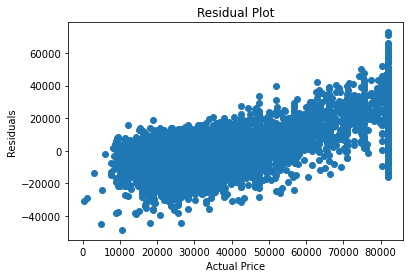

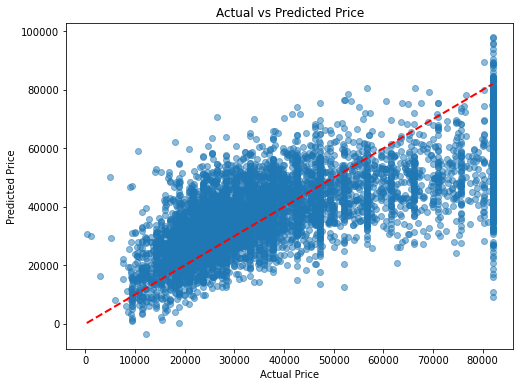

Training Set Performance:
Train MSE: 195730124.8331033
Train RMSE: 13990.358281084273
Train R²: 0.5019905160991347


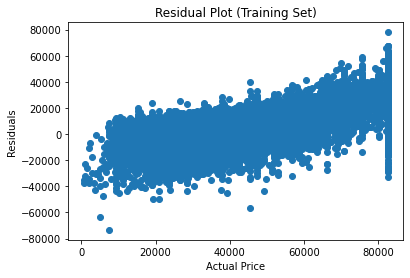

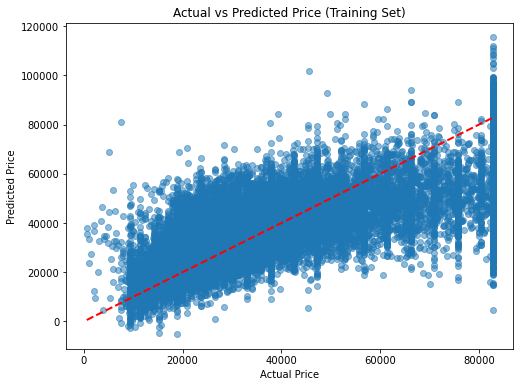

Feature Importance:
bathrooms                                                           1.469755e+16
calculated_host_listings_count_shared_rooms                         1.258548e+16
calculated_host_listings_count_private_rooms                        3.284109e+15
host_country_MI                                                     2.606571e+04
neighbourhood_cleansed_Puerto Madero                                2.395086e+04
property_type_Entire villa                                          1.635936e+04
property_type_Entire chalet                                         1.166496e+04
property_type_Casa particular                                       9.472508e+03
property_type_Entire home                                           9.333781e+03
property_type_Room in boutique hotel                                9.297035e+03
amenity_"Dishwasher"                                                8.372414e+03
accommodates                                                        7.649552e+03
amenity_

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. Separate features and target
X_train = train_set.drop('price', axis=1)
y_train = train_set['price']

X_test = test_set.drop('price', axis=1)
y_test = test_set['price']

# 2. Instantiate and train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 3. Make predictions on the test set
y_pred = lin_reg.predict(X_test)

# 4. Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred)

print(f"Test Set Performance:")
print(f"Test MSE: {mse_lr}")
print(f"Test RMSE: {rmse_lr}")
print(f"Test R²: {r2_lr}")


# 7. Plot the residuals
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.xlabel('Actual Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# 8. Plot actual vs predicted price
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line for perfect predictions
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

# 6. Evaluate the model on the training set
y_train_pred = lin_reg.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Training Set Performance:")
print(f"Train MSE: {train_mse}")
print(f"Train RMSE: {train_rmse}")
print(f"Train R²: {train_r2}")

# 9. Plot residuals for training set
residuals_train = y_train - y_train_pred
plt.scatter(y_train, residuals_train)
plt.xlabel('Actual Price')
plt.ylabel('Residuals')
plt.title('Residual Plot (Training Set)')
plt.show()

# 10. Plot actual vs predicted price for the training set
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)  # Diagonal line for perfect predictions
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price (Training Set)')
plt.show()

# 5. Feature Importance
feature_importance = pd.Series(lin_reg.coef_, index=X_train.columns).sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance)


# XGBoost

In [28]:
# Check which columns contain special characters
special_chars = X_train.columns[X_train.columns.str.contains(r"[\[\]<>,]")]

# Print the problematic columns
print(f"Columns with special characters: {special_chars.tolist()}")

# Further clean specific column names
def forcefully_clean_specific_columns(df):
    # Replace or remove any problematic characters left after the initial cleaning
    df.columns = df.columns.str.replace(r'[\[\]\(\),\'"]', '', regex=True)  # Remove any remaining [ ] ( ) , ' "
    df.columns = df.columns.str.replace(r' ', '_')  # Optionally replace spaces with underscores
    return df

# Apply the function again to clean the remaining problematic column names
X_train = forcefully_clean_specific_columns(X_train)
X_test = forcefully_clean_specific_columns(X_test)

# Reset index to ensure the DataFrame structure is correct
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

import numpy as np

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)


Columns with special characters: ["verification_['email', 'phone', 'work_email']", "verification_['email', 'phone']", 'amenity_"Kitchen"]', 'amenity_"Room-darkening shades"]', 'amenity_["Shower gel"', 'amenity_["Wifi"', 'amenity_"Exercise equipment"]', 'amenity_["First aid kit"', 'amenity_["Refrigerator"', 'amenity_["Carbon monoxide alarm"', 'amenity_["Elevator"']


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters found: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}
Test Set Performance:
Mean Squared Error (MSE): 163242367.0753223
Root Mean Squared Error (RMSE): 12776.633636264378
R² Score: 0.570440726112192
Training Set Performance:
Train MSE: 122449691.63290185
Train RMSE: 11065.698876840172
Train R²: 0.6884429119640147


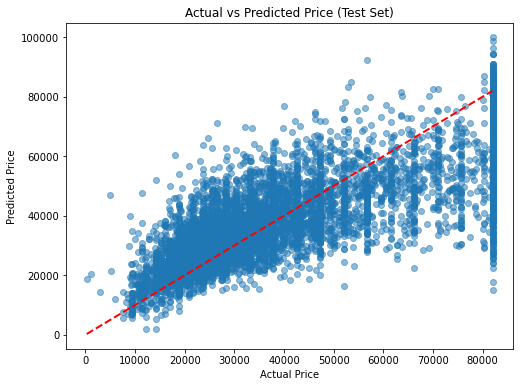

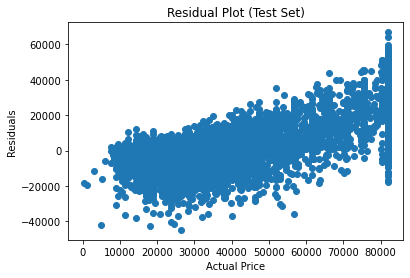

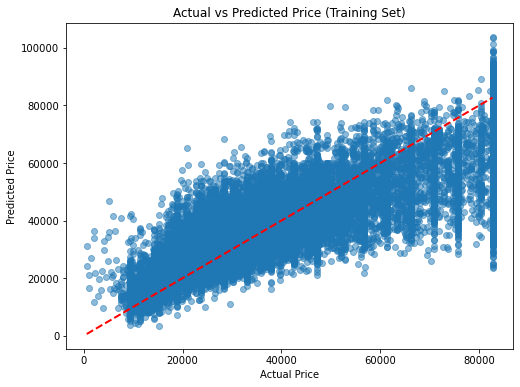

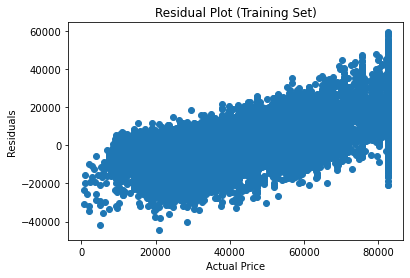

In [29]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define XGBoost parameters
param_grid = {
    'max_depth': [3, 5],  # Reduced options for faster search
    'learning_rate': [0.1],  # Fixed learning rate
    'n_estimators': [100, 200],  # Fewer options for quicker search
    'subsample': [0.8],  # Fixed value for now
    'colsample_bytree': [0.8],  # Fixed value for now
    'reg_alpha': [0, 0.1],  # Reduced options
    'reg_lambda': [1],  # Fixed value for now
}

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Setup GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# Train the final model with the best parameters
xgb_best = xgb.XGBRegressor(**best_params)
xgb_best.fit(X_train, y_train)

# Make predictions on the test set using the fitted model 'xgb_best'
y_pred_test = xgb_best.predict(X_test)

# Make predictions on the training set
y_pred_train = xgb_best.predict(X_train)

# Evaluate the model on the test set
mse_xgb = mean_squared_error(y_test, y_pred_test)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_test)

print(f"Test Set Performance:")
print(f"Mean Squared Error (MSE): {mse_xgb}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb}")
print(f"R² Score: {r2_xgb}")

# Evaluate the model on the training set
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"Training Set Performance:")
print(f"Train MSE: {mse_train}")
print(f"Train RMSE: {rmse_train}")
print(f"Train R²: {r2_train}")

# Plot actual vs predicted price for the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line for perfect predictions
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price (Test Set)')
plt.show()

# Plot residuals for the test set
residuals_test = y_test - y_pred_test
plt.scatter(y_test, residuals_test)
plt.xlabel('Actual Price')
plt.ylabel('Residuals')
plt.title('Residual Plot (Test Set)')
plt.show()

# Plot actual vs predicted price for the training set
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)  # Diagonal line for perfect predictions
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price (Training Set)')
plt.show()

# Plot residuals for the training set
residuals_train = y_train - y_pred_train
plt.scatter(y_train, residuals_train)
plt.xlabel('Actual Price')
plt.ylabel('Residuals')
plt.title('Residual Plot (Training Set)')
plt.show()


# Random Forest

Test Set Performance:
Test MSE: 163242367.0753223
Test RMSE: 12776.633636264378
Test R²: 0.570440726112192
Training Set Performance:
Train MSE: 24786884.144761134
Train RMSE: 4978.642801483265
Train R²: 0.9369330429285287


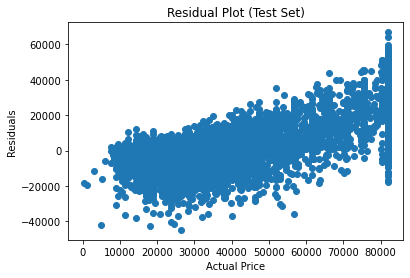

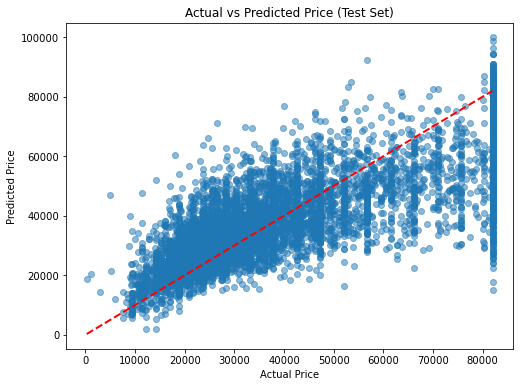

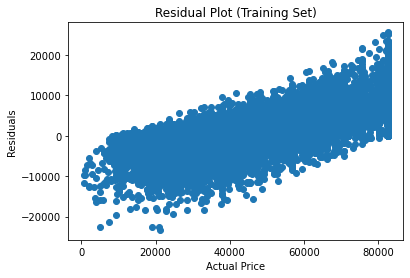

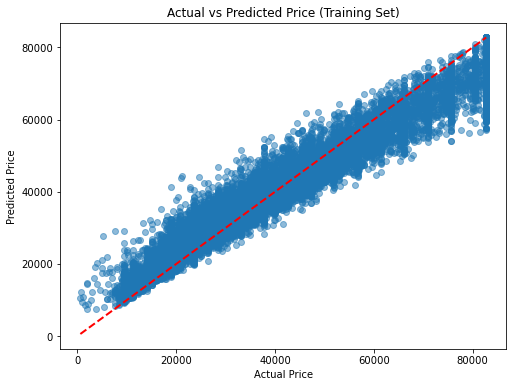

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate the model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_reg.fit(X_train, y_train)

# Make predictions
y_pred = rf_reg.predict(X_test)


# Evaluate the model on the test set
mse_rf = mean_squared_error(y_test, y_pred_test)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_test)

print(f"Test Set Performance:")
print(f"Test MSE: {mse_rf}")
print(f"Test RMSE: {rmse_rf}")
print(f"Test R²: {r2_rf}")

# Evaluate the model on the training set
y_pred_train = rf_reg.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"Training Set Performance:")
print(f"Train MSE: {mse_train}")
print(f"Train RMSE: {rmse_train}")
print(f"Train R²: {r2_train}")

# 5. Plot residuals for test set
residuals_test = y_test - y_pred_test
plt.scatter(y_test, residuals_test)
plt.xlabel('Actual Price')
plt.ylabel('Residuals')
plt.title('Residual Plot (Test Set)')
plt.show()

# 6. Plot actual vs predicted price for the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line for perfect predictions
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price (Test Set)')
plt.show()

# 7. Plot residuals for training set
residuals_train = y_train - y_pred_train
plt.scatter(y_train, residuals_train)
plt.xlabel('Actual Price')
plt.ylabel('Residuals')
plt.title('Residual Plot (Training Set)')
plt.show()

# 8. Plot actual vs predicted price for the training set
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)  # Diagonal line for perfect predictions
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price (Training Set)')
plt.show()

# comparative table of results

In [31]:
# Create a DataFrame to store the results of the models
results = pd.DataFrame({
    'Model': ['Linear Regression', 'XGBoost', 'Random Forest'],
    'RMSE': [mse_lr, mse_xgb, mse_rf],
    'RMSE': [rmse_lr, rmse_xgb, rmse_rf],
    'R² Score': [r2_lr, r2_xgb, r2_rf]
})

# Display the comparison table
print("Model Comparison Table:")
print(results)

# Answer the question based on the results
best_model = results.loc[results['RMSE'].idxmin()]['Model']
print(f"The best model for predicting Airbnb rental prices based on RMSE is: {best_model}")


Model Comparison Table:
               Model          RMSE  R² Score
0  Linear Regression  13882.674466  0.492850
1            XGBoost  12776.633636  0.570441
2      Random Forest  12776.633636  0.570441
The best model for predicting Airbnb rental prices based on RMSE is: XGBoost
